In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../dataset/loan_approval_dataset.csv')
data.columns = data.columns.str.strip()
print(data.isnull().sum())
data.dropna(inplace=True)

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [3]:
label_cols = ["education", "self_employed", "loan_status"]
le = LabelEncoder()

for col in label_cols:
    data[col] = le.fit_transform(data[col])

In [4]:
x = data.drop(["loan_id","loan_status"], axis=1)
y = data["loan_status"]

In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [8]:
results = {}

Training Random Forest...
Random Forest Accuracy: 97.78%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



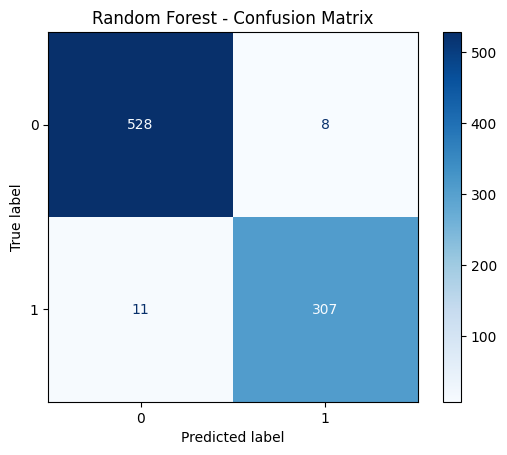

Training Logistic Regression...
Logistic Regression Accuracy: 90.52%
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



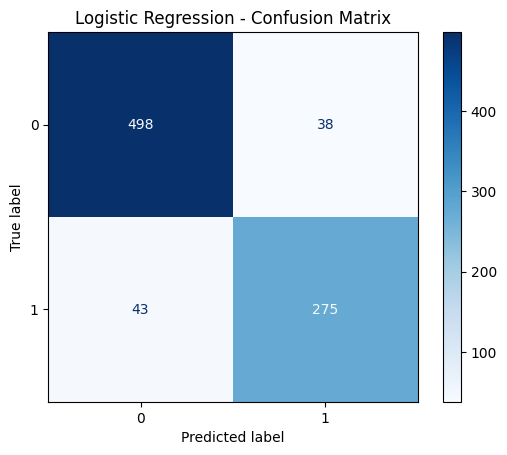

Training XGBoost...
XGBoost Accuracy: 98.24%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.98      0.97      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



c:\Users\praka\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:37:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


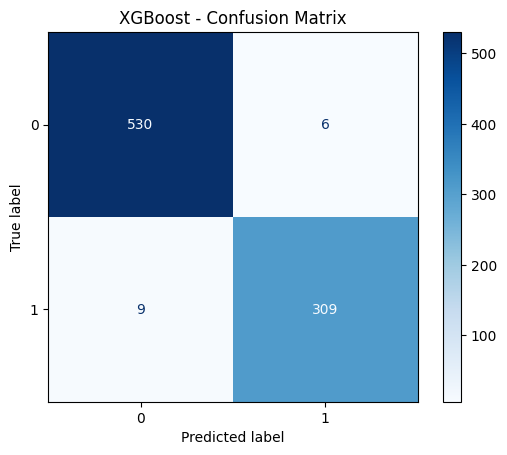

In [9]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    results[name] = {
        "model": model,
        "accuracy" : acc,
    }

    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

In [10]:
best_model = max(results, key=lambda x: results[x]['accuracy'])
print(f"Best Model: {best_model} with Accuracy: {results[best_model]['accuracy'] * 100:.2f}%")

Best Model: XGBoost with Accuracy: 98.24%


In [11]:
import joblib, os

os.makedirs('../model', exist_ok=True)

joblib.dump(results[best_model]['model'], '../model/model.pkl')
joblib.dump(scaler, '../model/preprocessor.pkl')

['../model/preprocessor.pkl']